In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Telecum.csv')

In [5]:
# print(df.info())

In [6]:
missing_values = df.isnull().sum()

In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 0


In [32]:
df['PaymentMethod'] = df['PaymentMethod'].str.strip().str.replace(' ', '_')
df['Churn'] = df['Churn'].str.capitalize()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['tenure'] = df['tenure'].astype(int)

In [33]:
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = df[service_columns].apply(lambda row: (row == 'Yes').sum(), axis=1)

In [34]:
df['AverageChargesperService'] = df["MonthlyCharges"] / df['TotalServices'] 

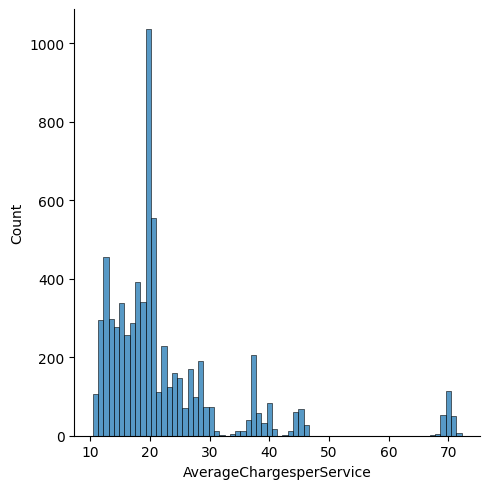

In [35]:
sns.displot(df['AverageChargesperService'])
plt.show()

In [36]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['MonthlyCharges'] < (Q1 - 1.5 * IQR)) | (df['MonthlyCharges'] > (Q3 + 1.5 * IQR)))
print(f"\nNumber of outliers in 'MonthlyCharges': {outliers.sum()}")
df = df[~outliers]


Number of outliers in 'MonthlyCharges': 0


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])